<a href="https://colab.research.google.com/github/JIBIIII/MOF-to-improve-clustering-algorithm/blob/main/Python%20code%20sportify%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def euclid_distance(p1, p2):
    return np.sqrt(np.sum(np.square(p1 - p2)))

def Neighborhood(arr):
    arr_size = len(arr)
    n_arr = arr.reshape((1, arr_size))
    distance_diff = n_arr - n_arr.T
    nbh = np.sum(np.where(distance_diff >= 0, 1, 0), axis=0)
    return nbh

def NBH_Matrix(data):
    d_size = len(data)
    dist_matrix = np.zeros((d_size, d_size))
    for i in range(d_size):
        for j in range(i+1, d_size):
            dist_matrix[i,j] = euclid_distance(data[i], data[j])
            dist_matrix[j,i] = dist_matrix[i,j]
    Neighbor_matrix = np.ones((d_size, d_size))
    Neighbor_matrix = np.apply_along_axis(Neighborhood, 1, dist_matrix)
    return Neighbor_matrix

def MassRatio(data):
    minor_NBH_matrix = NBH_Matrix(data)
    return minor_NBH_matrix / np.transpose(minor_NBH_matrix)

def MOF_p(pre_arr, i):
    arr = np.delete(pre_arr, i, axis=0)
    return np.var(arr)

def MOF(data):
    MR_Matrix = MassRatio(data)
    d_size = len(data)
    MRV_Matrix = np.zeros(d_size)
    for i in range(d_size):
        MRV_Matrix[i] = MOF_p(MR_Matrix[:, i], i)
    return MRV_Matrix


def find_outliers(data, percentile=95):
    # Calculate MOF values
    mof_values = MOF(data)

    # Determine the threshold based on the specified percentile
    threshold = np.percentile(mof_values, percentile)

    # Find outliers based on the calculated threshold
    outliers = np.where(mof_values > threshold)

    return outliers

def remove_outliers(data, percentile=95):
    # Find outlier indices using the find_outliers function
    outlier_indices = find_outliers(data, percentile)

    # Remove outliers from the data
    cleaned_data = np.delete(data, outlier_indices, axis=0)

    # Get the indices of the cleaned data in the original dataset
    cleaned_indices = np.setdiff1d(np.arange(data.shape[0]), outlier_indices)

    return cleaned_data, cleaned_indices


AgglomerativeClustering(ward)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
dataset_path = "spotify_dataset10.csv"
data = pd.read_csv(dataset_path)

Saving spotify_dataset10.csv to spotify_dataset10.csv


<ipython-input-3-6876d0835b50>:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


In [ ]:
print(data.tempo)

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64


In [ ]:
display(data)


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
0              0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1              0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2              0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3              0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4              0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
...                 ...       ...      ...  ...                     ...   
42300          0.000345    0.1210   0.3940  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050   0.3830  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850   0.1240  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575   0.4880  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140   0.1340  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                                     ...   
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
...                                                  ...         ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      

In [ ]:
import plotly.express as px

genre_count = data['genre'].value_counts()

fig = px.pie(names=genre_count.index, values=genre_count.values, title='Pie Chart of Genre Counts')

fig.show()


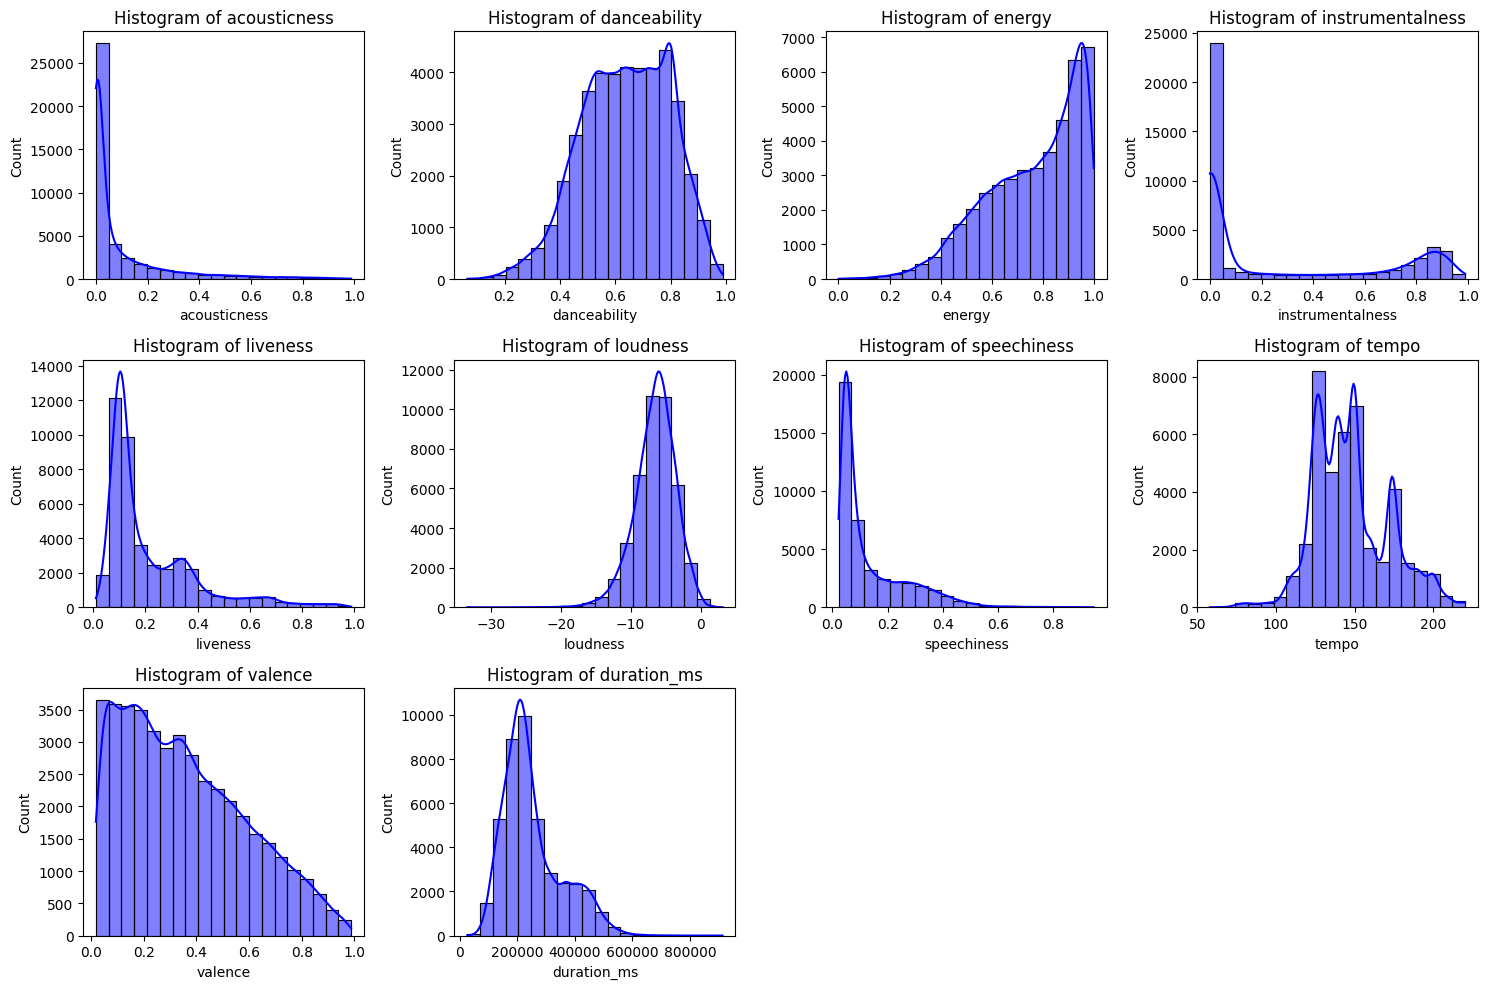

In [ ]:
selected_columns1 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms']
data_selected_before = data[selected_columns1]

plt.figure(figsize=(15, 10))
for idx, column in enumerate(selected_columns1):
    plt.subplot(3, 4, idx + 1)
    sns.histplot(data=data_selected_before, x=column, kde=True, color='blue', bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [ ]:
data.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

In [ ]:
import numpy as np

def systematic_sampling(data, n_samples):
    data_size = len(data)
    k = data_size // n_samples
    random_start = np.random.randint(0, k)
    indices = np.arange(random_start, data_size, k)[:n_samples]
    sampled_data = data.iloc[indices]

    # Reset the index and drop the old index column
    sampled_data = sampled_data.reset_index(drop=True)

    return sampled_data

n_samples = 8000
sampled_data = systematic_sampling(data, n_samples)
print(sampled_data)


      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.850   0.893    5    -4.783     1       0.0623       0.01380   
1            0.694   0.711    8    -5.525     1       0.2210       0.03970   
2            0.825   0.761    8    -5.389     1       0.1040       0.01110   
3            0.814   0.575   11    -9.635     1       0.0635       0.17200   
4            0.777   0.711    0    -3.902     1       0.1370       0.31200   
...            ...     ...  ...       ...   ...          ...           ...   
7995         0.756   0.877    6    -3.146     1       0.1880       0.17000   
7996         0.415   0.916    4    -4.747     0       0.1450       0.00955   
7997         0.486   0.740    6    -7.242     0       0.3740       0.00230   
7998         0.477   0.955    5    -2.879     0       0.0352       0.00739   
7999         0.324   0.921   11    -5.076     0       0.0604       0.00791   

      instrumentalness  liveness  valence  ...                 

In [ ]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      8000 non-null   float64
 1   energy            8000 non-null   float64
 2   key               8000 non-null   int64  
 3   loudness          8000 non-null   float64
 4   mode              8000 non-null   int64  
 5   speechiness       8000 non-null   float64
 6   acousticness      8000 non-null   float64
 7   instrumentalness  8000 non-null   float64
 8   liveness          8000 non-null   float64
 9   valence           8000 non-null   float64
 10  tempo             8000 non-null   float64
 11  type              8000 non-null   object 
 12  id                8000 non-null   object 
 13  uri               8000 non-null   object 
 14  track_href        8000 non-null   object 
 15  analysis_url      8000 non-null   object 
 16  duration_ms       8000 non-null   int64  


In [ ]:
sampled_data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.719   0.493    8    -7.230     1       0.0794        0.4010   
1         0.718   0.668    8    -4.162     1       0.1370        0.0254   
2         0.736   0.932    1    -3.726     1       0.2710        0.1460   
3         0.755   0.298    1   -15.032     1       0.0915        0.1540   
4         0.876   0.768    7    -6.606     1       0.2010        0.1120   

   instrumentalness  liveness  valence  ...                      id  \
0          0.000000     0.118   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
1          0.007800     0.124   0.0380  ...  0XfQbq7DaMOmVXgQ71eA6E   
2          0.002500     0.182   0.1800  ...  0QiF3l617bIKVrkBqgdMHE   
3          0.329000     0.101   0.0372  ...  28xkYPSP0P5xu5vT6MQfCy   
4          0.000012     0.283   0.7200  ...  09320vyX4qHd4GjHIpy5w0   

                                    uri  \
0  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
1  spotify:track:0XfQbq7DaMOmVXgQ71eA6E   
2  spotify:track:0QiF3l617bIKVrkBqgdMHE   
3  spotify:track:28xkYPSP0P5xu5vT6MQfCy   
4  spotify:track:09320vyX4qHd4GjHIpy5w0   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
1  https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...   
2  https://api.spotify.com/v1/tracks/0QiF3l617bIK...   
3  https://api.spotify.com/v1/tracks/28xkYPSP0P5x...   
4  https://api.spotify.com/v1/tracks/09320vyX4qHd...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
1  https://api.spotify.com/v1/audio-analysis/0XfQ...       77584   
2  https://api.spotify.com/v1/audio-analysis/0QiF...      115775   
3  https://api.spotify.com/v1/audio-analysis/28xk...      123054   
4  https://api.spotify.com/v1/audio-analysis/0932...      124676   

  time_signature      genre                  song_name Unnamed: 0 title  
0              4  Dark Trap                  Pathology        NaN   NaN  
1              4  Dark Trap         kamikaze (+ pulse)        NaN   NaN  
2              4  Dark Trap     Troll Under the Bridge        NaN   NaN  
3              4  Dark Trap  Okay,ButThisIsTheLastTime        NaN   NaN  
4              5  Dark Trap             High 'N Mighty        NaN   NaN  

[5 rows x 22 columns]

In [ ]:
# Check for missing values
missing_values = sampled_data.isnull().sum()
missing_values

danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
type                   0
id                     0
uri                    0
track_href             0
analysis_url           0
duration_ms            0
time_signature         0
genre                  0
song_name           3697
Unnamed: 0          4305
title               4305
dtype: int64

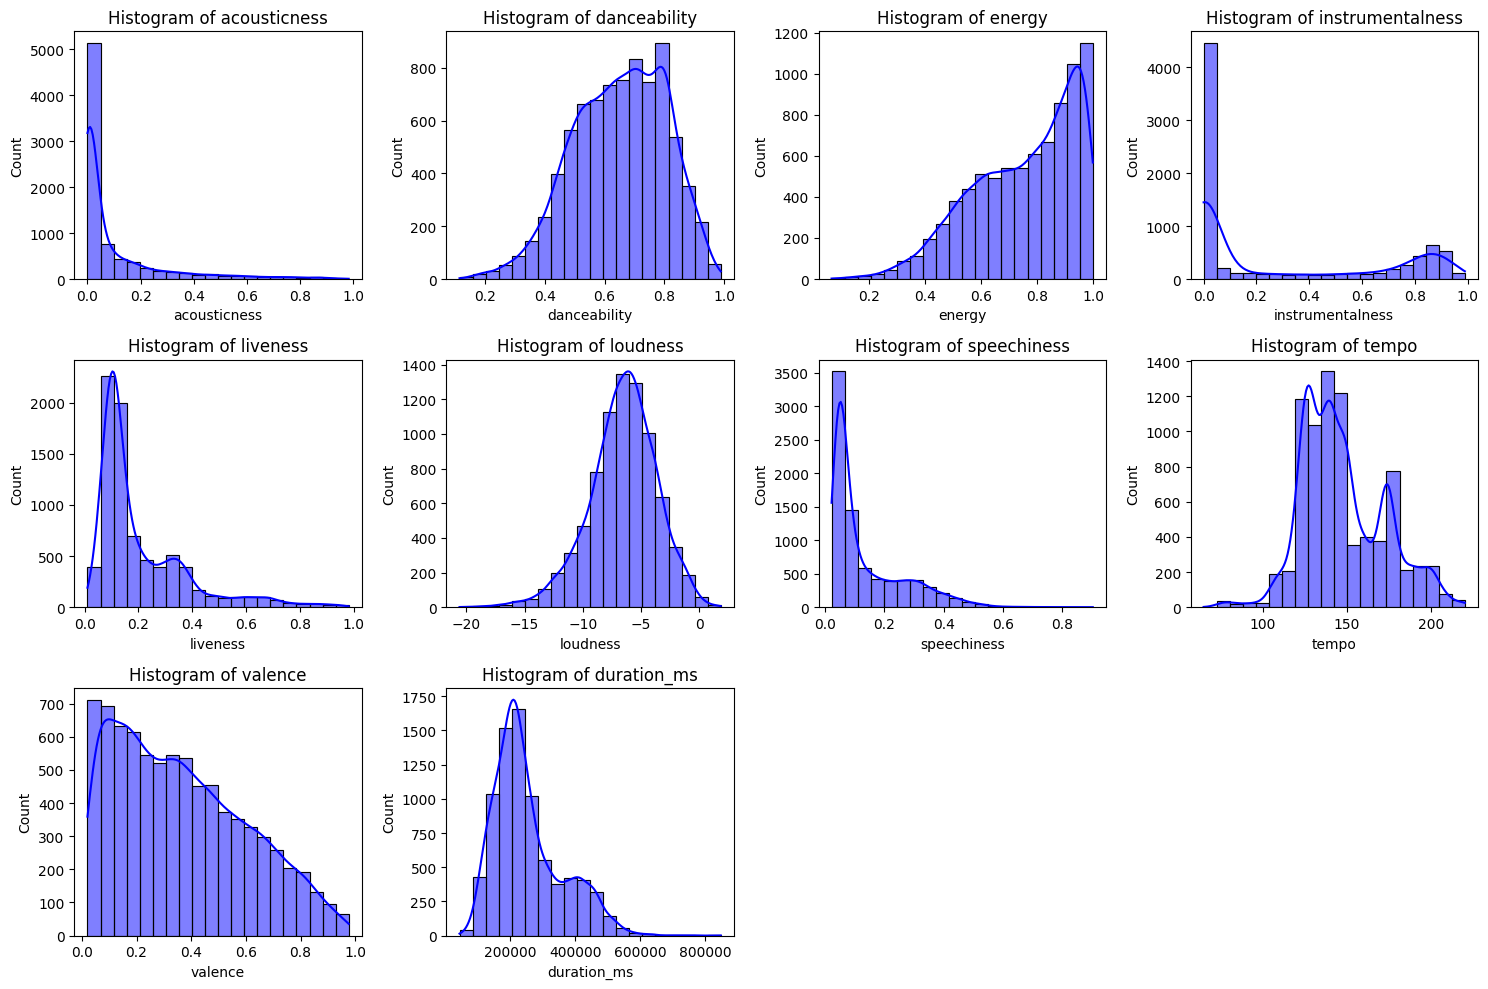

In [ ]:
selected_columns1 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms']
data_selected = sampled_data[selected_columns1]

plt.figure(figsize=(15, 10))
for idx, column in enumerate(selected_columns1):
    plt.subplot(3, 4, idx + 1)
    sns.histplot(data=data_selected, x=column, kde=True, color='blue', bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import numpy as np

# Create a custom color scale
unique_genres = sampled_data['genre'].nunique()
color_scale_1 = px.colors.qualitative.Plotly
color_scale_2 = px.colors.qualitative.Dark24
color_scale_3 = px.colors.qualitative.Light24
color_scale = color_scale_1 + color_scale_2 + color_scale_3

# Create a categorical mapping for genres
genre_mapping = pd.Categorical(sampled_data['genre'].unique())

# Assign a color to each genre in the sampled_data DataFrame
sampled_data['color'] = sampled_data['genre'].apply(lambda x: color_scale[np.where(genre_mapping == x)[0][0]])

# Create a histogram with custom colors for each genre
fig = px.histogram(sampled_data, x='genre', color='color', nbins=unique_genres, category_orders={'genre': sampled_data['genre'].unique()})

# Customize the color scale of the histogram
fig.update_traces(marker=dict(line=dict(width=1, color='black')))

# Update the layout and axis labels
fig.update_layout(title='Histogram of Genre Counts', xaxis_title='Genre', yaxis_title='Count')

fig.show()


In [ ]:
import plotly.express as px

genre_count = sampled_data['genre'].value_counts()

fig = px.pie(names=genre_count.index, values=genre_count.values, title='Pie Chart of Genre Counts')

fig.show()


In [ ]:
data_clean = sampled_data.drop_duplicates()

In [ ]:
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo','instrumentalness']
data_selected = data_clean[selected_columns].values

# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_selected)

#Apply kmean
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them in the original scale
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a dataframe to nicely format the output
centroids_df = pd.DataFrame(centroids_original_scale, columns=selected_columns)

# Display the dataframe
print(centroids_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   danceability    energy  loudness  speechiness  acousticness  liveness  \
0      0.661470  0.708136 -6.314005     0.176634      0.133751  0.210813   
1      0.622803  0.837259 -7.200281     0.069413      0.034253  0.216445   

    valence       tempo  instrumentalness  
0  0.409327  150.285522          0.031064  
1  0.265575  140.947347          0.785283  


In [ ]:
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo','instrumentalness']
data_selected = data_clean[selected_columns].values

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data_selected)

cleaned_data, cleaned_indices = remove_outliers(data_selected, percentile=95)

# Standardize the data
scaler = StandardScaler()
cleaned_scaled_data = scaler.fit_transform(cleaned_data)

In [ ]:
selected_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo','instrumentalness']
data_selected = data_clean[selected_columns].values

cleaned_data, cleaned_indices = remove_outliers(data_selected, percentile=95)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
cleaned_scaled_data = scaler.fit_transform(cleaned_data)


In [ ]:
data_clean.describe()

danceability       energy          key     loudness         mode  \
count   8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean       0.651001     0.754872     5.335000    -6.551707     0.564375   
std        0.153474     0.184184     3.671507     2.901825     0.495870   
min        0.116000     0.067100     0.000000   -20.585000     0.000000   
25%        0.540000     0.620000     1.000000    -8.228250     0.000000   
50%        0.661000     0.792000     6.000000    -6.362500     1.000000   
75%        0.774000     0.916000     9.000000    -4.640500     1.000000   
max        0.988000     0.999000    11.000000     1.851000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  8000.000000   8000.000000       8000.000000  8000.000000  8000.000000   
mean      0.137843      0.097680          0.291186     0.206857     0.364370   
std       0.124916      0.172296          0.373567     0.171167     0.237676   
min       0.023200      0.000001          0.000000     0.010700     0.020600   
25%       0.049700      0.001610          0.000000     0.098200     0.160000   
50%       0.076200      0.016600          0.006885     0.131000     0.332000   
75%       0.200000      0.110250          0.739000     0.278000     0.539000   
max       0.902000      0.982000          0.989000     0.981000     0.976000   

             tempo    duration_ms  time_signature    Unnamed: 0  
count  8000.000000    8000.000000     8000.000000   3695.000000  
mean    147.313429  252813.079375        3.975750   9318.093369  
std      24.634684  105126.066955        0.262051   5377.415186  
min      64.950000   43807.000000        1.000000      1.000000  
25%     128.067000  180003.000000        4.000000   4668.500000  
50%     141.996500  225726.500000        4.000000   9314.000000  
75%     164.497000  306907.000000        4.000000  13968.500000  
max     220.100000  847302.000000        5.000000  18640.000000

In [ ]:
cleaned_data1 = pd.DataFrame(cleaned_data, columns=selected_columns)
print(cleaned_data1.describe())

       danceability       energy     loudness  speechiness  acousticness  \
count   7600.000000  7600.000000  7600.000000  7600.000000   7600.000000   
mean       0.649401     0.762624    -6.441324     0.135768      0.091889   
std        0.153215     0.178856     2.696020     0.123940      0.165665   
min        0.116000     0.119000   -18.127000     0.023200      0.000001   
25%        0.538000     0.629000    -8.144250     0.049600      0.001400   
50%        0.659000     0.800000    -6.326000     0.074800      0.014700   
75%        0.772000     0.919000    -4.619750     0.193000      0.099400   
max        0.988000     0.999000     1.424000     0.902000      0.982000   

          liveness      valence        tempo  instrumentalness  
count  7600.000000  7600.000000  7600.000000       7600.000000  
mean      0.208319     0.364199   148.205113          0.298663  
std       0.172491     0.237468    22.786241          0.375194  
min       0.010700     0.021800   107.930000          0

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

genres_cleaned = data_clean['genre'].iloc[cleaned_indices]

genre_count_cleaned = genres_cleaned.value_counts()

# Create a pie chart of the genre counts in the cleaned data
fig = px.pie(names=genre_count_cleaned.index, values=genre_count_cleaned.values, title='Pie Chart of Genre Counts (Cleaned Data)')

fig.show()


In [ ]:
print("Non-finite values in cleaned_data:", np.sum(~np.isfinite(cleaned_scaled_data)))


Non-finite values in cleaned_data: 0


In [ ]:
outlier_indices = find_outliers(data_selected)
outliers = data_clean.iloc[outlier_indices]
print(f"Number of outliers: {len(outliers)}")
display(outliers)
outliers.describe()

Number of outliers: 400


danceability  energy  key  loudness  mode  speechiness  acousticness  \
82           0.615   0.674    0    -7.991     1       0.0805      0.147000   
87           0.308   0.238   11   -15.630     0       0.0816      0.899000   
89           0.840   0.589    5   -14.435     1       0.0900      0.018500   
90           0.697   0.354    5   -15.064     1       0.2060      0.892000   
91           0.543   0.268   11   -17.464     0       0.0862      0.577000   
...            ...     ...  ...       ...   ...          ...           ...   
7152         0.561   0.981    9     0.490     1       0.4290      0.006060   
7161         0.637   0.980    9    -0.118     1       0.2030      0.000502   
7326         0.596   0.971    1     1.566     1       0.1380      0.021500   
7454         0.595   0.758   10   -15.259     0       0.0656      0.015500   
7562         0.356   0.952    4     1.498     0       0.2340      0.098600   

      instrumentalness  liveness  valence  ...  \
82            0.000372    0.2960   0.0395  ...   
87            0.000312    0.1100   0.1520  ...   
89            0.037300    0.1180   0.0309  ...   
90            0.000002    0.0539   0.5750  ...   
91            0.000702    0.2860   0.1180  ...   
...                ...       ...      ...  ...   
7152          0.000470    0.0946   0.2210  ...   
7161          0.001650    0.2140   0.4850  ...   
7326          0.898000    0.3930   0.2810  ...   
7454          0.877000    0.0699   0.4850  ...   
7562          0.623000    0.5370   0.0539  ...   

                                       uri  \
82    spotify:track:1x63HWJxacGCvIPEEd52yK   
87    spotify:track:5mOMcaRWBDMyvP5FWnaJo1   
89    spotify:track:5FC02TqooA6IpVfGApgfl2   
90    spotify:track:3p8iG863bPsafyReUXaqXO   
91    spotify:track:5e8DUgWO5Zt96FN66VTyoo   
...                                    ...   
7152  spotify:track:3HjOpwgjEhNMpLMHS4OrFZ   
7161  spotify:track:5OHbgz6bSubQkwmeAjSm5h   
7326  spotify:track:6wTApAjrv6Ot4Kq7Fz8NhN   
7454  spotify:track:4nliTt7jzYzGhSdrC8ZGnW   
7562  spotify:track:3AghJwIDnDUXCB2ZTd6RPy   

                                             track_href  \
82    https://api.spotify.com/v1/tracks/1x63HWJxacGC...   
87    https://api.spotify.com/v1/tracks/5mOMcaRWBDMy...   
89    https://api.spotify.com/v1/tracks/5FC02TqooA6I...   
90    https://api.spotify.com/v1/tracks/3p8iG863bPsa...   
91    https://api.spotify.com/v1/tracks/5e8DUgWO5Zt9...   
...                                                 ...   
7152  https://api.spotify.com/v1/tracks/3HjOpwgjEhNM...   
7161  https://api.spotify.com/v1/tracks/5OHbgz6bSubQ...   
7326  https://api.spotify.com/v1/tracks/6wTApAjrv6Ot...   
7454  https://api.spotify.com/v1/tracks/4nliTt7jzYzG...   
7562  https://api.spotify.com/v1/tracks/3AghJwIDnDUX...   

                                           analysis_url duration_ms  \
82    https://api.spotify.com/v1/audio-analysis/1x63...      159504   
87    https://api.spotify.com/v1/audio-analysis/5mOM...      181951   
89    https://api.spotify.com/v1/audio-analysis/5FC0...      135947   
90    https://api.spotify.com/v1/audio-analysis/3p8i...      163109   
91    https://api.spotify.com/v1/audio-analysis/5e8D...      282307   
...                                                 ...         ...   
7152  https://api.spotify.com/v1/audio-analysis/3HjO...      293143   
7161  https://api.spotify.com/v1/audio-analysis/5OHb...      250286   
7326  https://api.spotify.com/v1/audio-analysis/6wTA...      266559   
7454  https://api.spotify.com/v1/audio-analysis/4nli...      451227   
7562  https://api.spotify.com/v1/audio-analysis/3Agh...      223729   

     time_signature      genre  \
82                4  Dark Trap   
87                5  Dark Trap   
89                4  Dark Trap   
90                4  Dark Trap   
91                4  Dark Trap   
...             ...        ...   
7152              4       trap   
7161              4       trap   
7326              4        dnb   
7454         

danceability      energy         key    loudness        mode  \
count    400.000000  400.000000  400.000000  400.000000  400.000000   
mean       0.681410    0.607594    5.260000   -8.648985    0.557500   
std        0.155399    0.219002    3.678482    5.073585    0.497305   
min        0.178000    0.067100    0.000000  -20.585000    0.000000   
25%        0.566250    0.438500    1.000000  -13.457750    0.000000   
50%        0.697500    0.604500    5.000000   -7.568500    1.000000   
75%        0.808500    0.771500    9.000000   -5.101750    1.000000   
max        0.988000    0.999000   11.000000    1.851000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   400.000000    400.000000        400.000000  400.000000  400.000000   
mean      0.177266      0.207713          0.149135    0.179094    0.367610   
std       0.136482      0.244259          0.308871    0.141047    0.241892   
min       0.025600      0.000018          0.000000    0.022100    0.020600   
25%       0.052275      0.018975          0.000000    0.099850    0.155000   
50%       0.130500      0.099500          0.000004    0.120000    0.345000   
75%       0.280500      0.325500          0.007803    0.202250    0.541000   
max       0.574000      0.952000          0.964000    0.943000    0.929000   

            tempo    duration_ms  time_signature    Unnamed: 0  
count  400.000000     400.000000      400.000000     34.000000  
mean   130.371427  210362.975000        3.942500   8907.058824  
std     44.439730   74162.979942        0.366783   4819.589659  
min     64.950000   69851.000000        1.000000    578.000000  
25%    101.443750  159575.500000        4.000000   4686.000000  
50%    108.779500  200111.000000        4.000000   7558.000000  
75%    149.743000  241302.750000        4.000000  13240.500000  
max    220.100000  632625.000000        5.000000  16421.000000

In [ ]:
# Find the mean, min, and max of the outliers
outliers_summary = outliers.describe()

mean_outliers = outliers_summary.loc['mean']
min_outliers = outliers_summary.loc['min']
max_outliers = outliers_summary.loc['max']

print("Mean of outliers:")
print(mean_outliers)

print("\nMin of outliers:")
print(min_outliers)

print("\nMax of outliers:")
print(max_outliers)

In [ ]:
data_standardized = pd.DataFrame(cleaned_scaled_data, columns=selected_columns)
print("Standardized data:")
print(data_standardized.head())
print("Summary statistics of the standardized data:")
print(data_standardized.describe())


Standardized data:
   danceability    energy  loudness  speechiness  acousticness  liveness  \
0      0.691514  0.425000  0.557363     0.063951      0.408350  0.110584   
1      0.690367  0.623864  0.714286     0.129495      0.025864  0.116768   
2      0.711009  0.923864  0.736586     0.281975      0.148675  0.176543   
3      0.732798  0.203409  0.158304     0.077720      0.156822  0.093064   
4      0.871560  0.737500  0.589279     0.202321      0.114052  0.280635   

    valence     tempo  instrumentalness  
0  0.107105  0.070131          0.000000  
1  0.016978  0.224576          0.007887  
2  0.165793  0.162665          0.002528  
3  0.016139  0.902660          0.332659  
4  0.731712  0.039509          0.000012  
Summary statistics of the standardized data:
       danceability       energy     loudness  speechiness  acousticness  \
count   7600.000000  7600.000000  7600.000000  7600.000000   7600.000000   
mean       0.611698     0.731390     0.597702     0.128093      0.093572   

agglomerative(single)

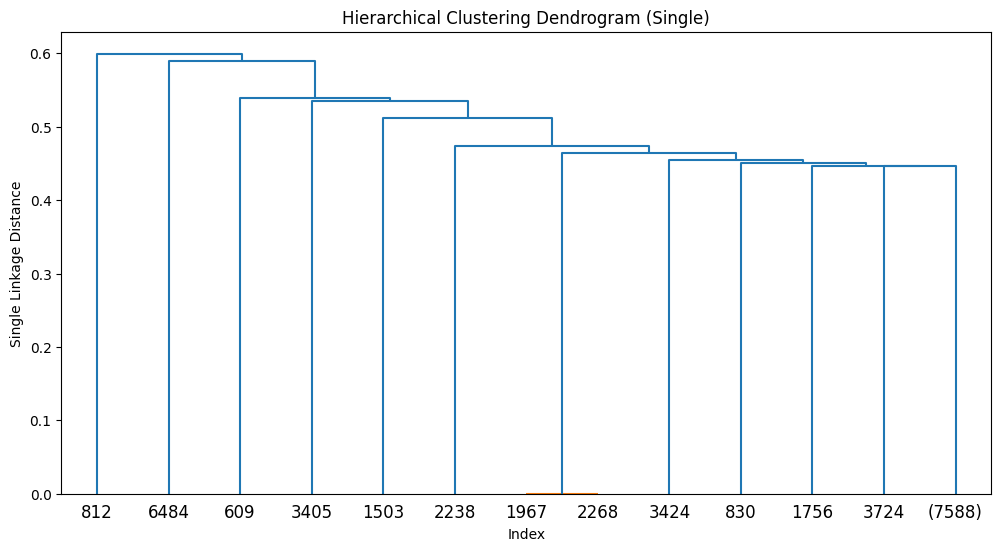

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(cleaned_scaled_data, method='single')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Index')
plt.ylabel('Single Linkage Distance')
plt.show()


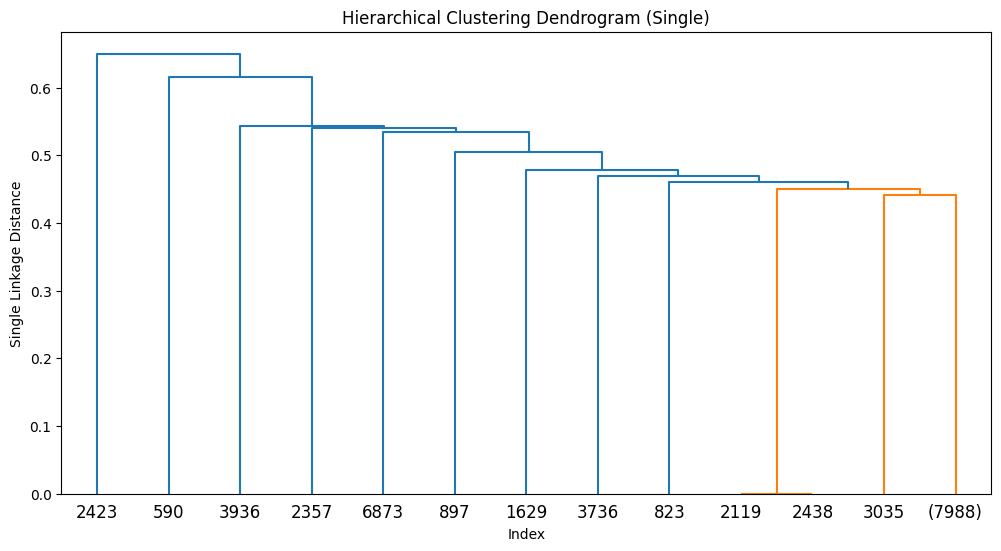

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_selected)
linked = linkage(data_scaled, method='single')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Index')
plt.ylabel('Single Linkage Distance')
plt.show()

   Number of Clusters  Silhouette Score (Original Data)  \
0                   2                          0.339819   
1                   3                          0.321393   
2                   4                          0.188770   
3                   5                          0.151580   
4                   6                          0.146915   
5                   7                          0.135428   
6                   8                          0.095304   
7                   9                          0.041737   
8                  10                          0.041726   

   Silhouette Score (Cleaned Data)  
0                         0.236172  
1                         0.228610  
2                         0.227921  
3                         0.111747  
4                         0.068478  
5                         0.046221  
6                         0.037430  
7                         0.014275  
8                        -0.000985  


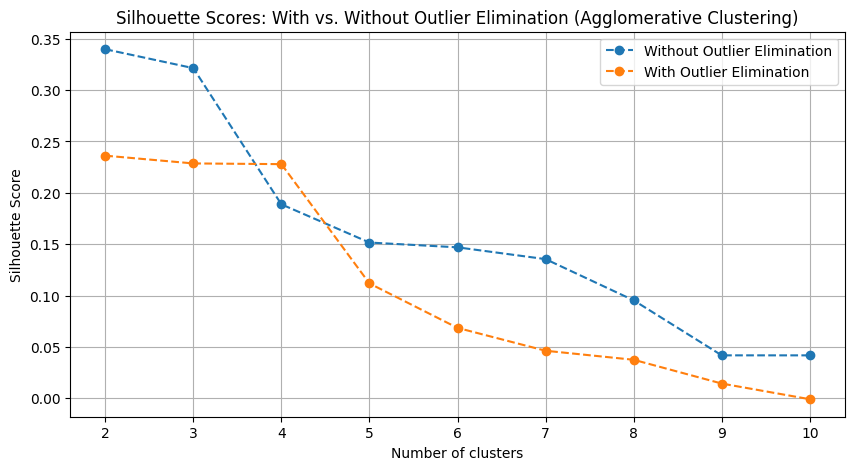

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_selected)
silhouette_scores_original = []
silhouette_scores_cleaned = []
for n_clusters in range(2, 11):
    # Apply AgglomerativeClustering for both cases
    model_original = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    model_original.fit(data_scaled)
    cluster_labels_original = model_original.labels_

    model_cleaned = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    model_cleaned.fit(cleaned_scaled_data)
    cluster_labels_cleaned = model_cleaned.labels_
    # Calculate silhouette scores for both cases
    silhouette_avg_original = silhouette_score(data_scaled, cluster_labels_original)
    silhouette_avg_cleaned = silhouette_score(cleaned_scaled_data, cluster_labels_cleaned)

    # Append silhouette scores to the respective lists
    silhouette_scores_original.append(silhouette_avg_original)
    silhouette_scores_cleaned.append(silhouette_avg_cleaned)
# Create a pandas DataFrame to display the results
results_df = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Silhouette Score (Original Data)': silhouette_scores_original,
    'Silhouette Score (Cleaned Data)': silhouette_scores_cleaned
})
# Display the results in table form
print(results_df)
cluster_range = range(2, 11)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores_original, marker='o', linestyle='--', label="Without Outlier Elimination")
plt.plot(cluster_range, silhouette_scores_cleaned, marker='o', linestyle='--', label="With Outlier Elimination")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores: With vs. Without Outlier Elimination (Agglomerative Clustering)")
plt.grid()
plt.legend()
plt.show()

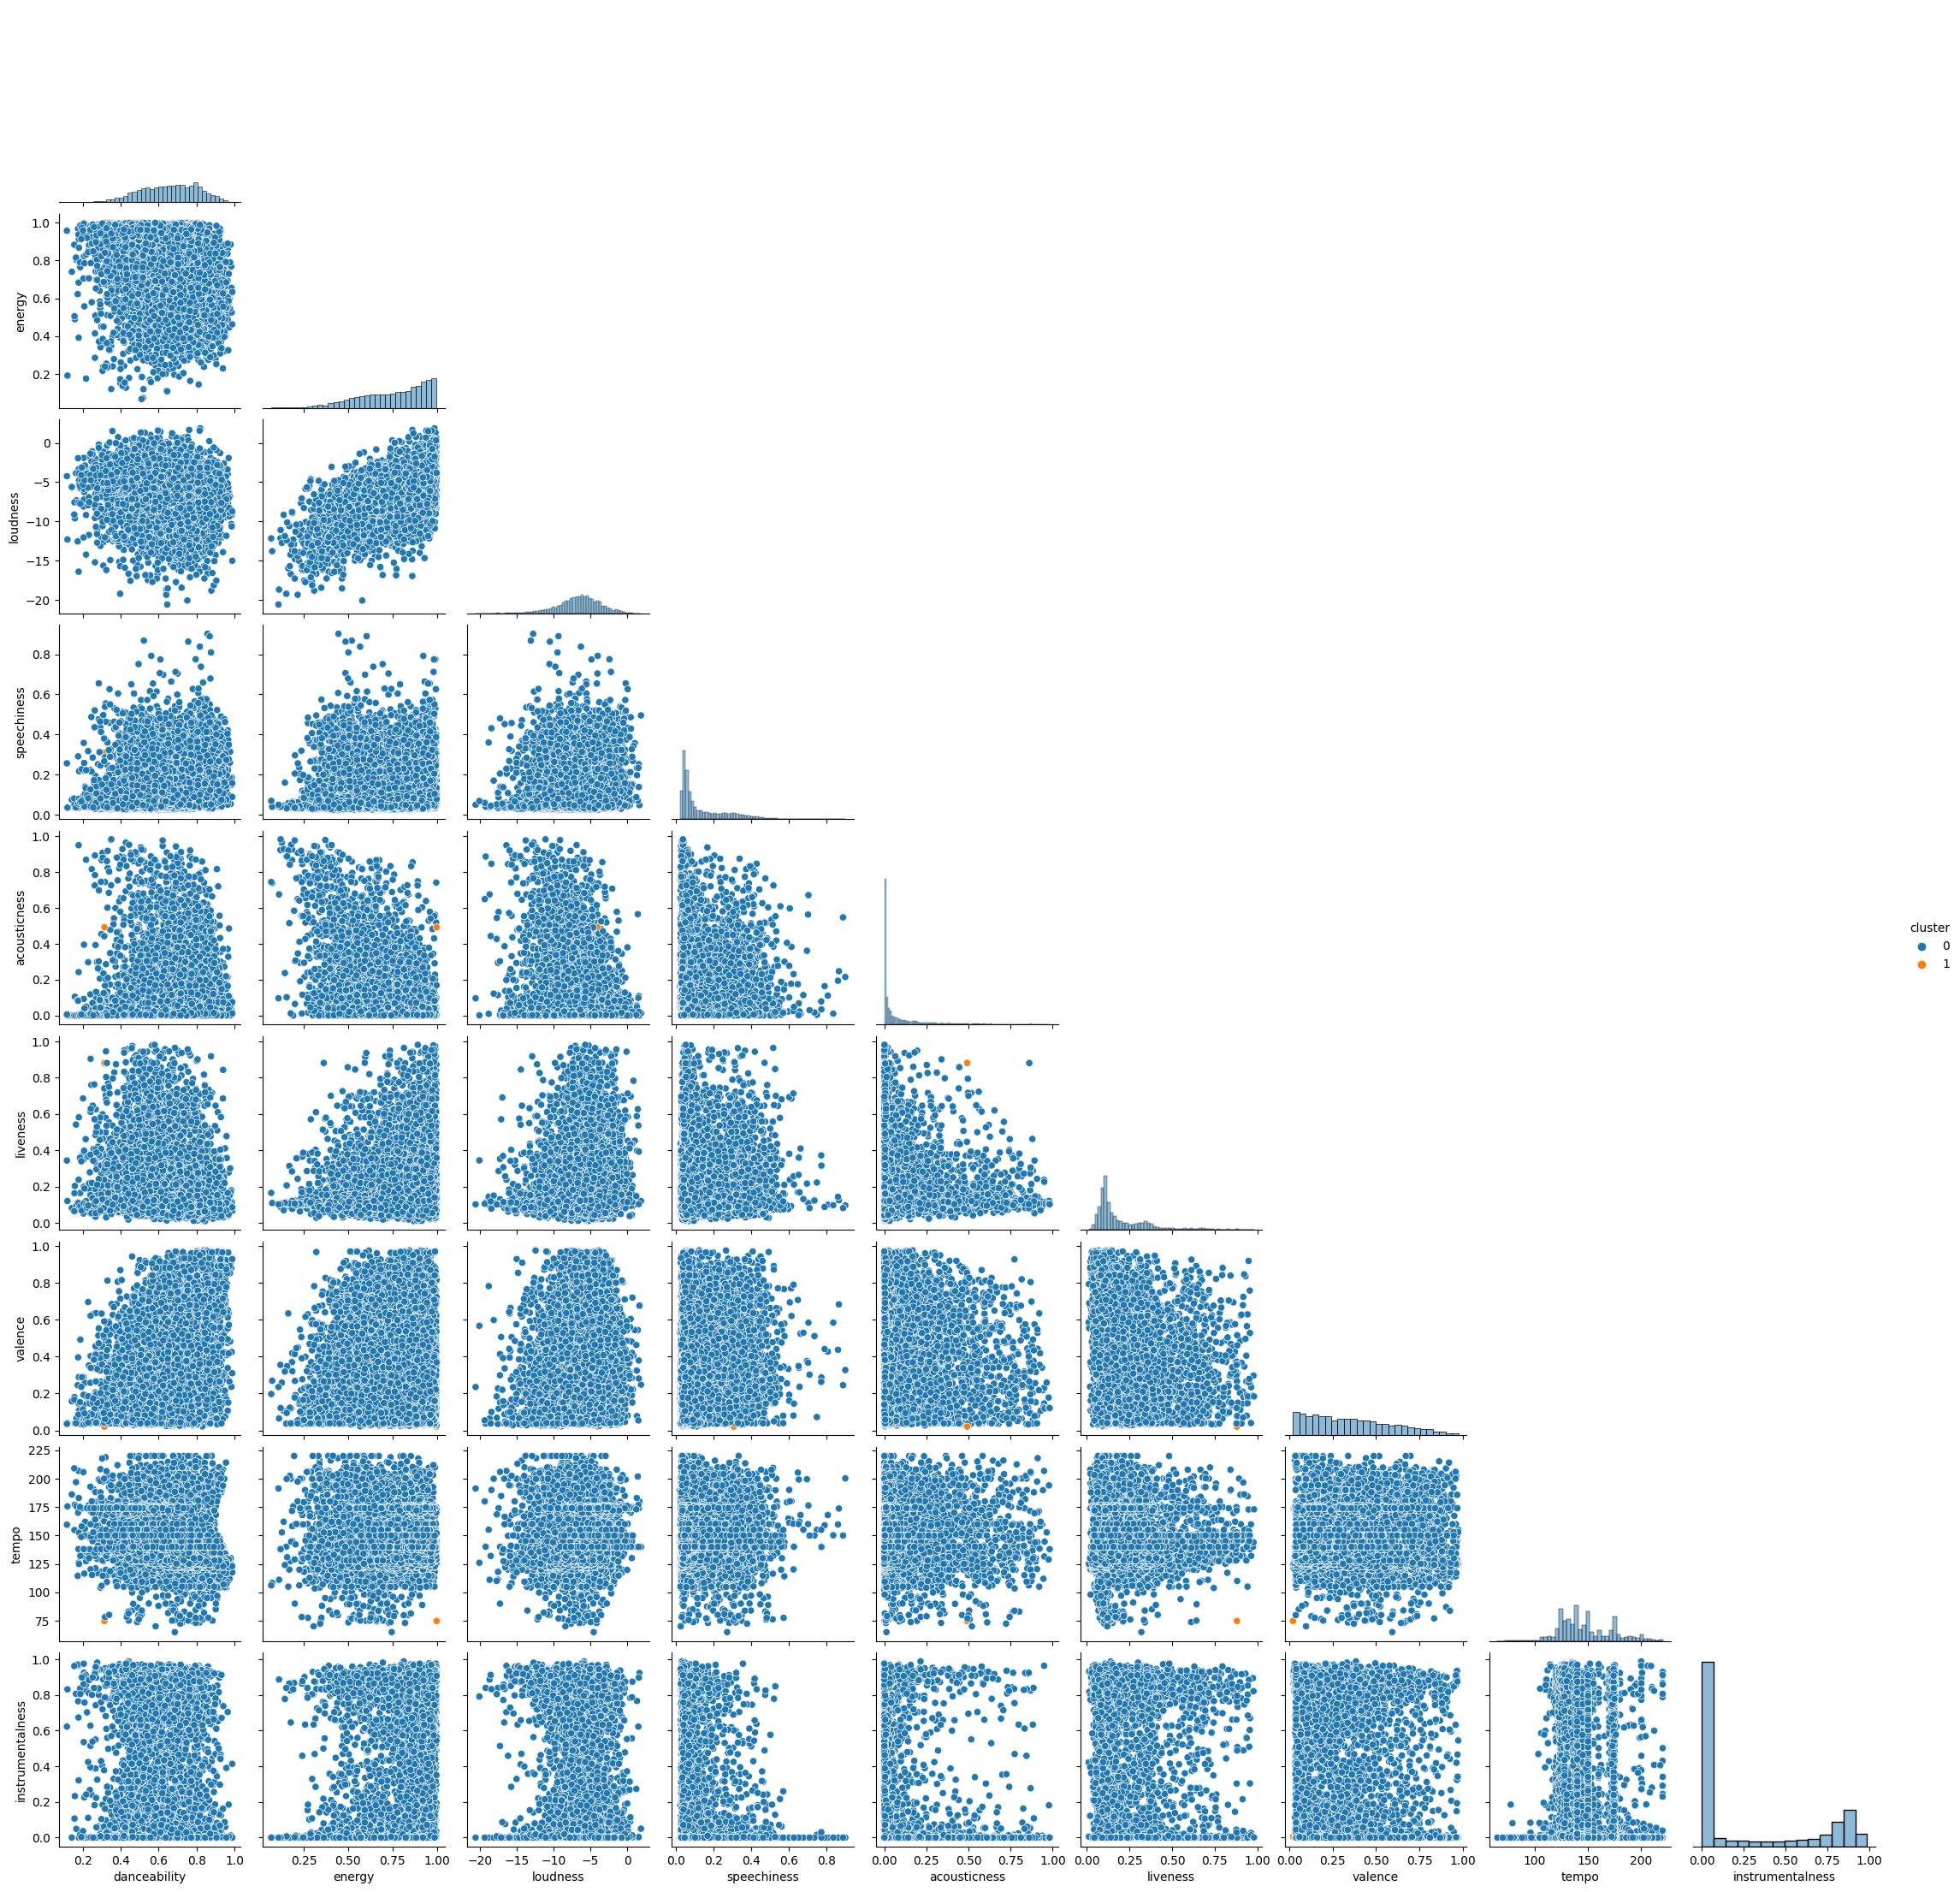

In [ ]:
optimal_clusters = 2

agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='single')

# Fit the model to the cleaned data and obtain cluster labels
#cluster_labels = agg_clustering.fit_predict(cleaned_scaled_data)
#data_cleaned = data_clean.iloc[cleaned_indices].copy()
#data_cleaned['cluster'] = cluster_labels

# Fit the model to the original data and obtain cluster labels
cluster_labels = agg_clustering.fit_predict(data_scaled)
sampled_data['cluster'] = cluster_labels

# Analyze the results by examining the distribution of features within each cluster
sns.pairplot(sampled_data, vars=selected_columns, hue='cluster', diag_kind='hist', corner=True)
plt.show()


In [ ]:
# Count the number of data points in each cluster
cluster_counts = sampled_data['cluster'].value_counts()

# Sort the cluster counts by cluster number
cluster_counts = cluster_counts.sort_index()

# Print the cluster counts
print("Number of data points in each cluster:")
print(cluster_counts)


Number of data points in each cluster:
0    7999
1       1
Name: cluster, dtype: int64


Kmean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

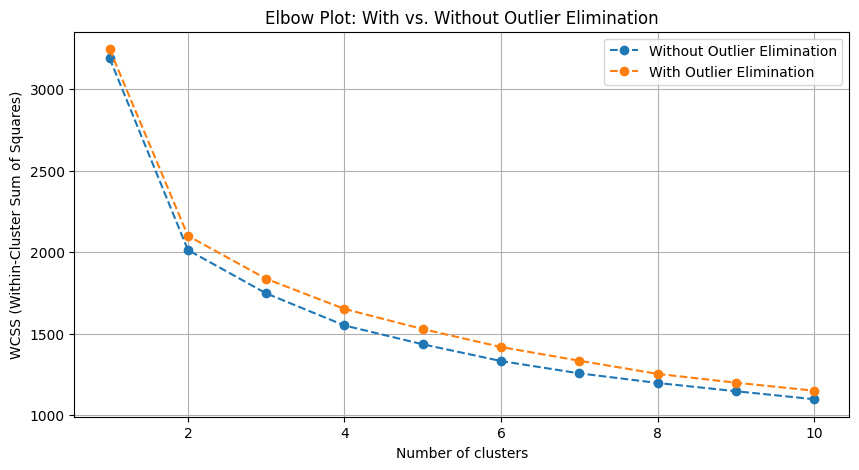

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_selected)
def calculate_wcss(data):
    wcss = []
    cluster_range = range(1, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return wcss
cluster_range = range(1, 11)
wcss_full = calculate_wcss(data_scaled)
wcss_cleaned = calculate_wcss(cleaned_scaled_data)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss_full, marker='o', linestyle='--', label="Without Outlier Elimination")
plt.plot(cluster_range, wcss_cleaned, marker='o', linestyle='--', label="With Outlier Elimination")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Plot: With vs. Without Outlier Elimination")
plt.grid()
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

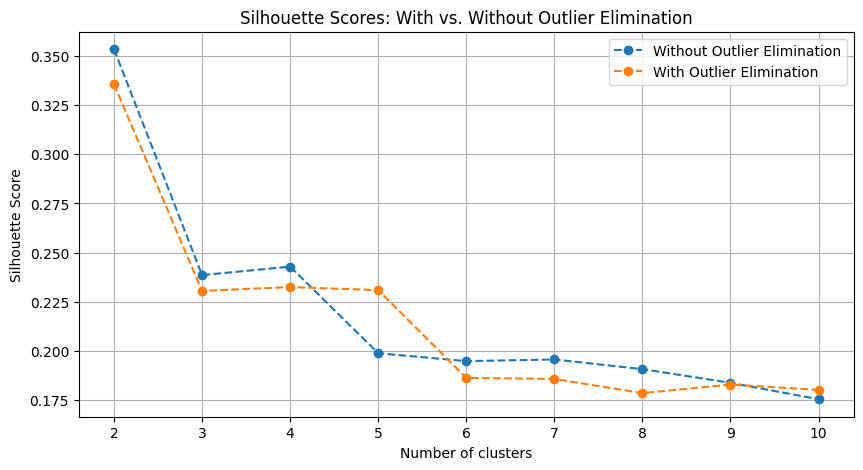

   Number of Clusters  Silhouette Score (Without Outlier Elimination)  \
0                   2                                        0.353417   
1                   3                                        0.238537   
2                   4                                        0.242842   
3                   5                                        0.198810   
4                   6                                        0.194788   
5                   7                                        0.195635   
6                   8                                        0.190713   
7                   9                                        0.183761   
8                  10                                        0.175412   

   Silhouette Score (With Outlier Elimination)  
0                                     0.335647  
1                                     0.230508  
2                                     0.232447  
3                                     0.230901  
4                       

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def calculate_silhouette_scores(data):
    silhouette_scores = []
    cluster_range = range(2, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        if len(set(labels)) > 1:  # check that there is more than 1 cluster
            sil_score = silhouette_score(data, labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(None)  # or some default value

    return silhouette_scores

cluster_range = list(range(2, 11))  # make this a list at the start

silhouette_scores_full = calculate_silhouette_scores(data_scaled)
silhouette_scores_cleaned = calculate_silhouette_scores(cleaned_scaled_data)

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores_full, marker='o', linestyle='--', label="Without Outlier Elimination")
plt.plot(cluster_range, silhouette_scores_cleaned, marker='o', linestyle='--', label="With Outlier Elimination")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores: With vs. Without Outlier Elimination")
plt.grid()
plt.legend()
plt.show()

# Create a pandas DataFrame to display the results
results_df = pd.DataFrame({
    'Number of Clusters': list(cluster_range),
    'Silhouette Score (Without Outlier Elimination)': silhouette_scores_full,
    'Silhouette Score (With Outlier Elimination)': silhouette_scores_cleaned
})

# Display the results in table form
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



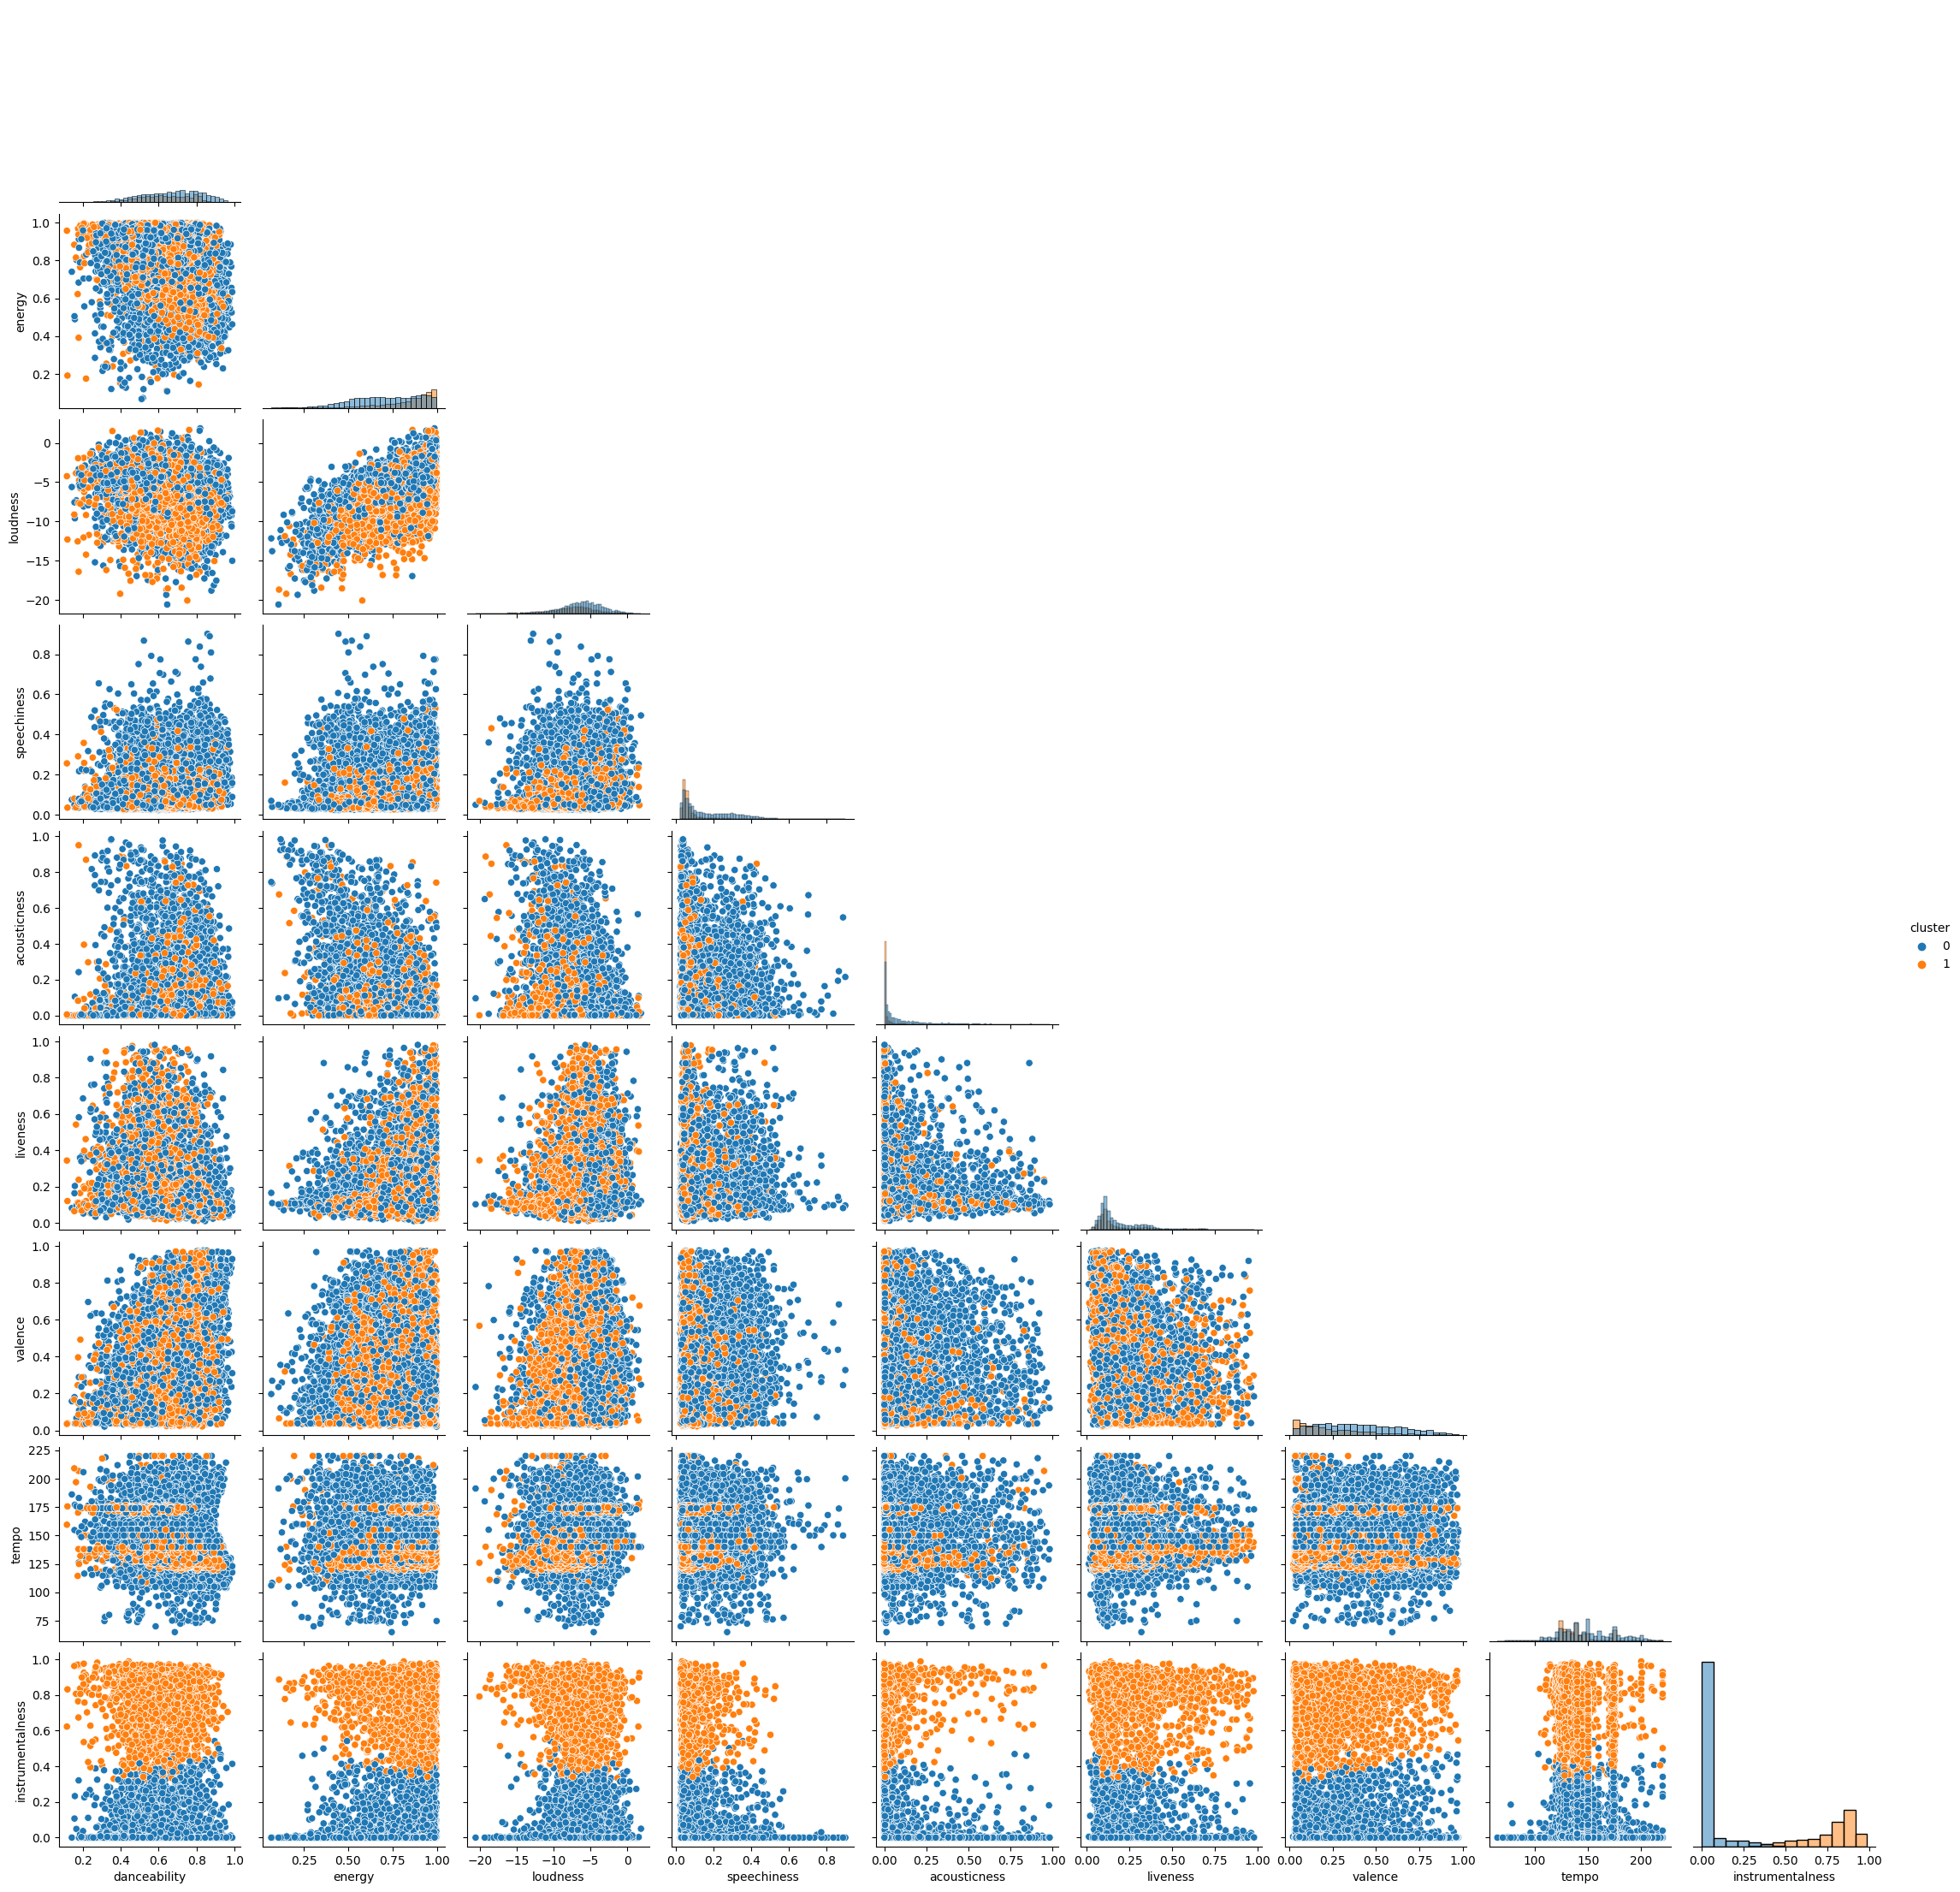

In [ ]:
optimal_clusters = 2
kmeans_clustering = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit the model to the cleaned data and obtain cluster labels
#cluster_labels = kmeans_clustering.fit_predict(cleaned_scaled_data)
#data_cleaned = data_clean.iloc[cleaned_indices].copy()
#data_cleaned['cluster'] = cluster_labels

# Fit the model to the original data and obtain cluster labels
cluster_labels = kmeans_clustering.fit_predict(data_scaled)
sampled_data['cluster'] = cluster_labels

# Analyze the results by examining the distribution of features within each cluster
sns.pairplot(sampled_data, vars=selected_columns, hue='cluster', diag_kind='hist', corner=True)
plt.show()

In [ ]:
# # Print silhouette scores
# for k, sil_score in zip(cluster_range, silhouette_scores):
#     print(f"Number of clusters: {k}, Silhouette Score: {sil_score:.4f}")

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the cleaned data
kmeans.fit(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

In [ ]:
data["cluster"] = -1  # Initialize a new column with -1 (outliers)
data.loc[cleaned_indices, "cluster"] = kmeans.labels_
# Print the size of each cluster
print(data["cluster"].value_counts())

# Calculate the mean values of each feature per cluster
print(data.groupby("cluster")[selected_columns].mean())


ValueError: ignored

In [ ]:
def plot_attribute_bars(data, attribute, cluster_col='cluster', bins=5):
    # Create a temporary DataFrame with the attribute and cluster columns
    temp_df = data[[attribute, cluster_col]]

    # Calculate the minimum and maximum values of the attribute
    min_val = temp_df[attribute].min()
    max_val = temp_df[attribute].max()

    # Calculate the bin width
    bin_width = (max_val - min_val) / bins

    # Create bins
    bin_edges = np.arange(min_val, max_val + bin_width, bin_width)
    bin_labels = [f'{round(edge, 2)} - {round(edge + bin_width, 2)}' for edge in bin_edges[:-1]]

    # Assign each data point to a bin
    temp_df['bin'] = pd.cut(temp_df[attribute], bins=bin_edges, labels=bin_labels, include_lowest=True)

    # Count the number of data points in each bin for each cluster
    bin_counts = temp_df.groupby([cluster_col, 'bin']).size().unstack().T

    # Plot the bar graph
    ax = bin_counts.plot(kind='bar', figsize=(10, 5))
    ax.set_xlabel(f'{attribute} ranges')
    ax.set_ylabel('Count')
    ax.set_title(f'{attribute} Distribution by Cluster')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



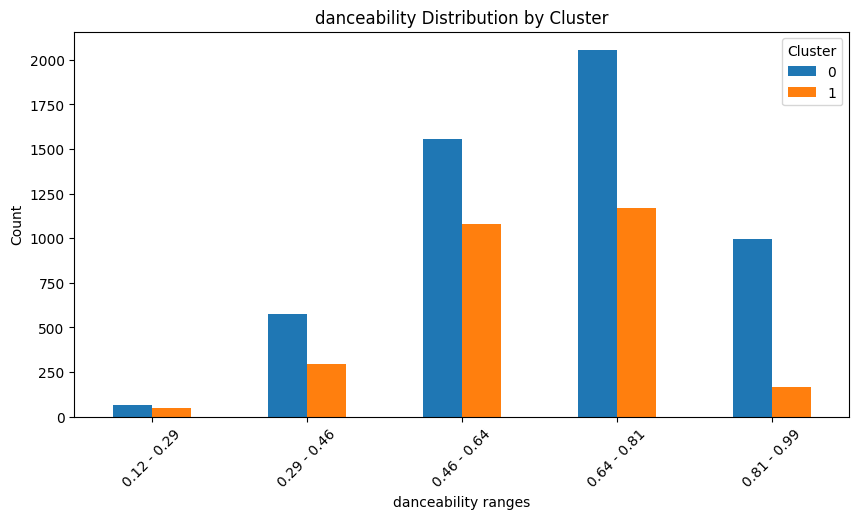

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



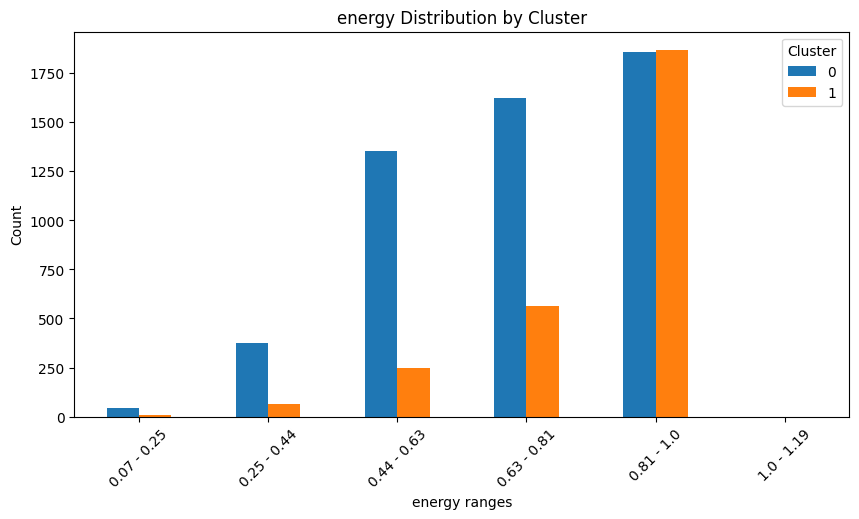

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



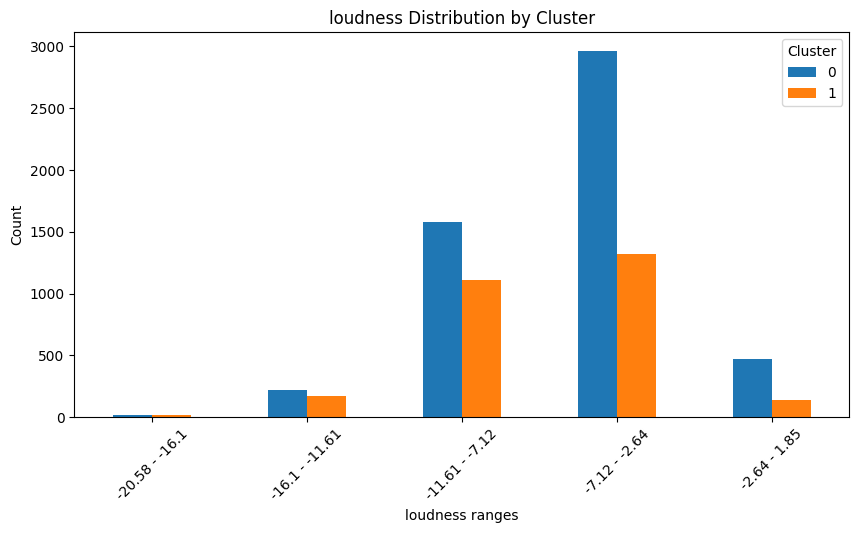

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



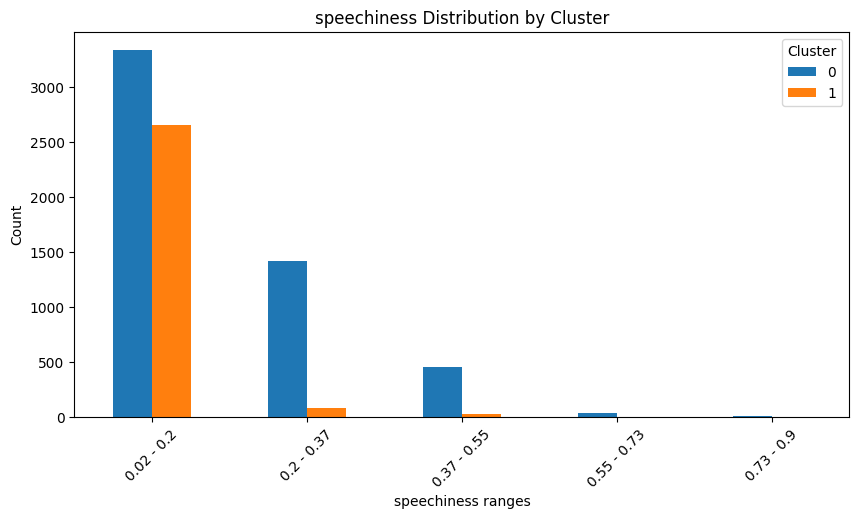

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



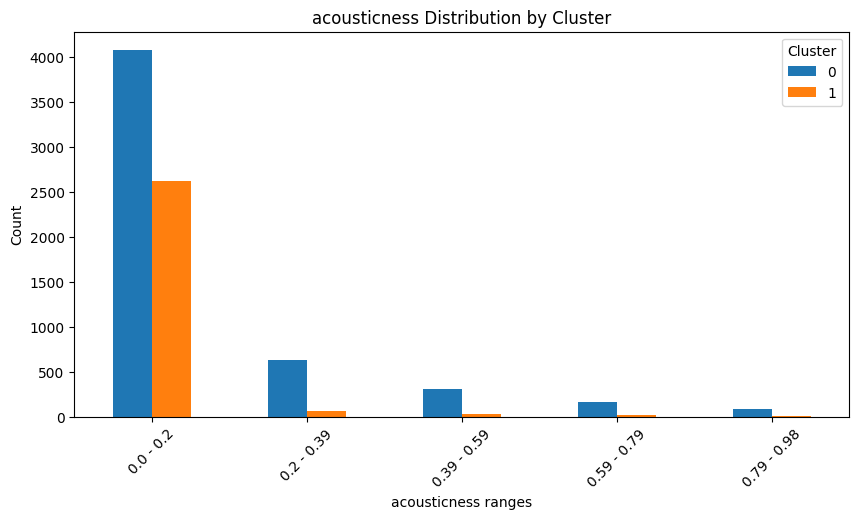

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



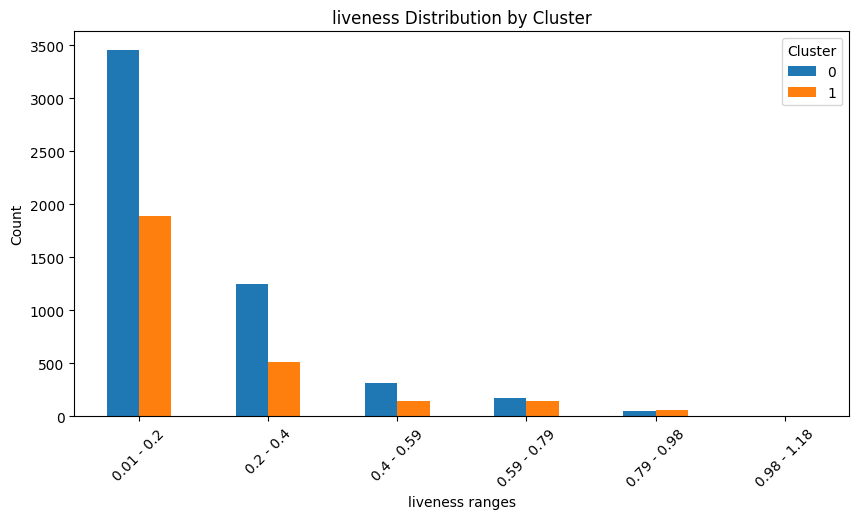

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



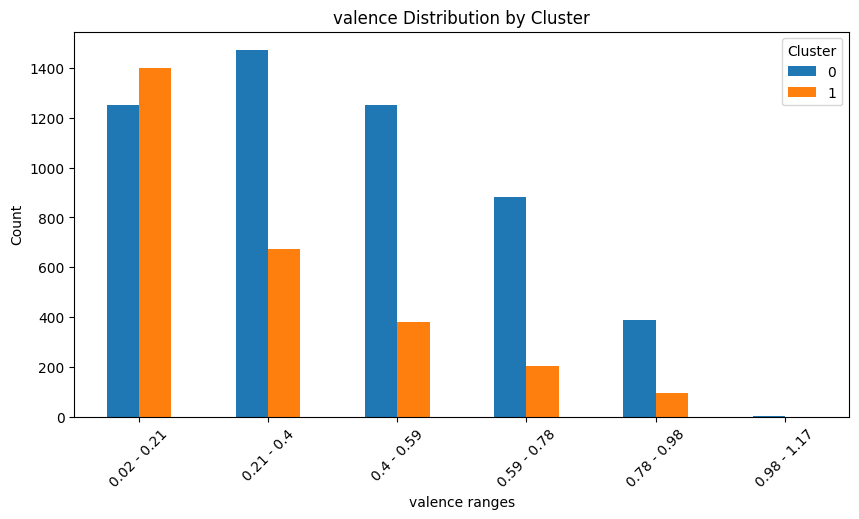

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



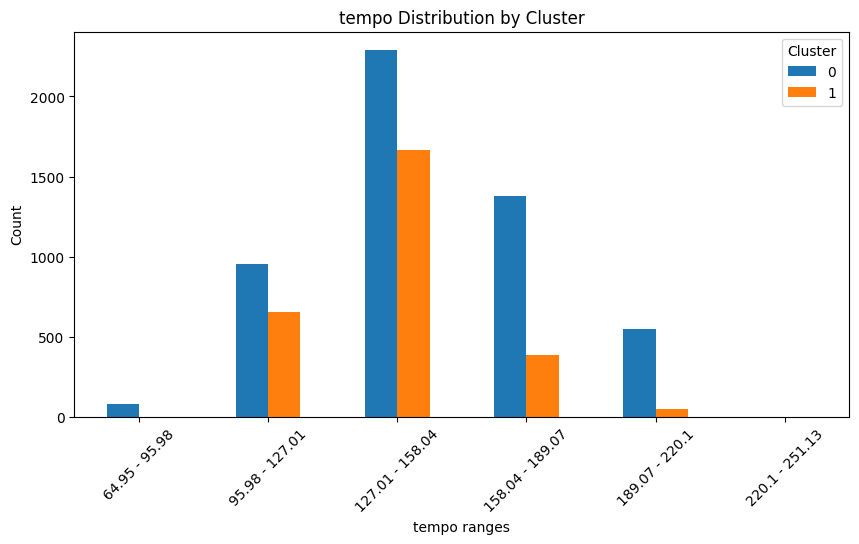

<ipython-input-30-6c256b0d6e0b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



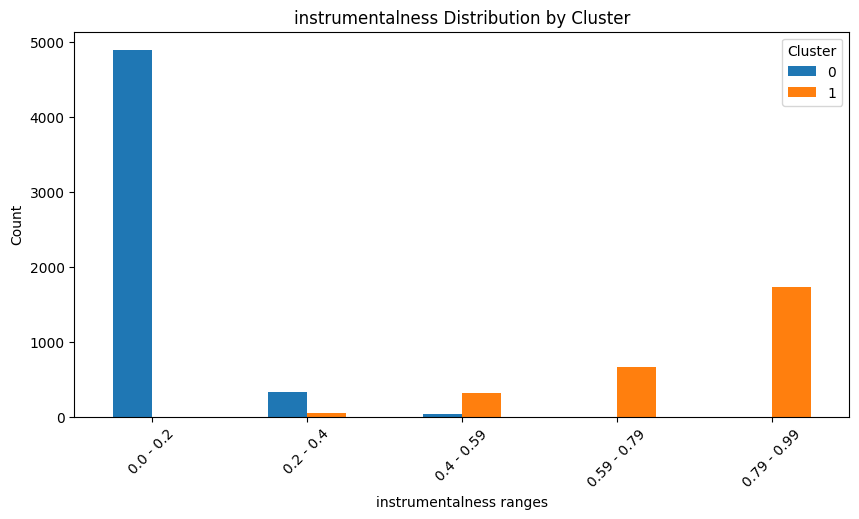

In [ ]:
optimal_clusters = 2
kmeans_clustering = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_clustering.fit_predict(data_scaled)

cleaned_data_original_scale = scaler.inverse_transform(data_scaled)
data_cleaned_original_scale = pd.DataFrame(cleaned_data_original_scale, columns=selected_columns)
data_cleaned_original_scale['cluster'] = cluster_labels
for column in selected_columns:
    plot_attribute_bars(data_cleaned_original_scale, column)

In [ ]:
def print_attribute_bin_counts(data, attribute, cluster_col='cluster', bins=5):
    # Create a temporary DataFrame with the attribute and cluster columns
    temp_df = data[[attribute, cluster_col]]

    # Calculate the minimum and maximum values of the attribute
    min_val = temp_df[attribute].min()
    max_val = temp_df[attribute].max()

    # Calculate the bin width
    bin_width = (max_val - min_val) / bins

    # Create bins
    bin_edges = np.arange(min_val, max_val + bin_width, bin_width)
    bin_labels = [f'{round(edge, 2)} - {round(edge + bin_width, 2)}' for edge in bin_edges[:-1]]

    # Assign each data point to a bin
    temp_df['bin'] = pd.cut(temp_df[attribute], bins=bin_edges, labels=bin_labels, include_lowest=True)

    # Count the number of data points in each bin for each cluster
    bin_counts = temp_df.groupby([cluster_col, 'bin']).size().unstack().T

    # Print the bin counts for each attribute, sorted by cluster
    print(f'{attribute} Distribution by Cluster:')
    print(bin_counts)
    print()

for column in selected_columns:
    print_attribute_bin_counts(data_cleaned_original_scale, column)


danceability Distribution by Cluster:
cluster         0     1
bin                    
0.12 - 0.29    62    45
0.29 - 0.46   573   295
0.46 - 0.64  1558  1078
0.64 - 0.81  2056  1170
0.81 - 0.99   998   163

energy Distribution by Cluster:
cluster         0     1
bin                    
0.07 - 0.25    42    10
0.25 - 0.44   374    62
0.44 - 0.63  1353   248
0.63 - 0.81  1623   563
0.81 - 1.0   1857  1868
1.0 - 1.19      0     0

loudness Distribution by Cluster:
cluster            0     1
bin                       
-20.58 - -16.1    16    18
-16.1 - -11.61   220   168
-11.61 - -7.12  1577  1113
-7.12 - -2.64   2967  1317
-2.64 - 1.85     469   135

speechiness Distribution by Cluster:
cluster         0     1
bin                    
0.02 - 0.2   3332  2648
0.2 - 0.37   1420    80
0.37 - 0.55   452    23
0.55 - 0.73    34     0
0.73 - 0.9     11     0

acousticness Distribution by Cluster:
cluster         0     1
bin                    
0.0 - 0.2    4074  2622
0.2 - 0.39    629    65
0.39

<ipython-input-32-2b56f3243945>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-2b56f3243945>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-2b56f3243945>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-2b56

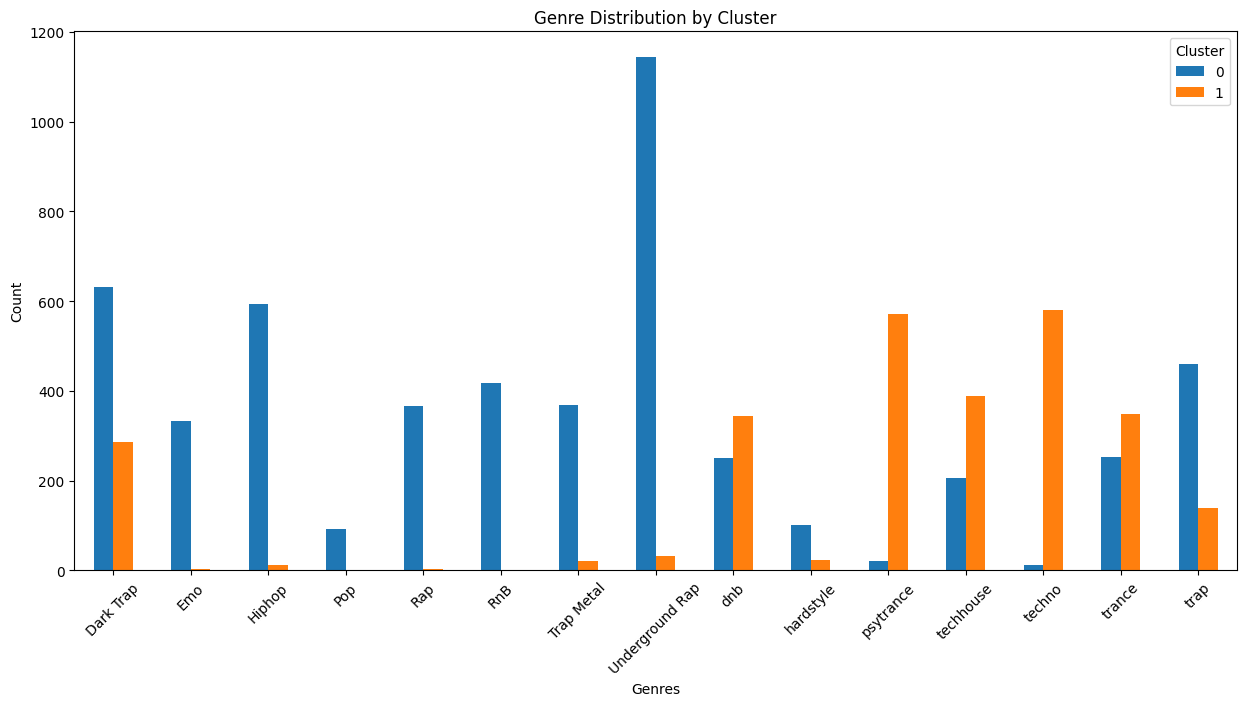

In [ ]:
def plot_genre_bars(data, genre_col='genre', cluster_col='cluster'):
    # Create a temporary DataFrame with the genre and cluster columns
    temp_df = data[[genre_col, cluster_col]]

    # Count the number of data points in each genre for each cluster
    genre_counts = temp_df.groupby([cluster_col, genre_col]).size().unstack().T

    # Plot the bar graph
    ax = genre_counts.plot(kind='bar', figsize=(15, 7))
    ax.set_xlabel('Genres')
    ax.set_ylabel('Count')
    ax.set_title('Genre Distribution by Cluster')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper right')
    plt.show()
plot_genre_bars(sampled_data)


In [ ]:
# Group the data by cluster and genre, then count the data points in each group
genre_counts = sampled_data.groupby(['cluster', 'genre']).size().reset_index(name='count')

# Rename the columns
genre_counts.columns = ['Cluster', 'Genre', 'Count']

# Sort the data by cluster and count
genre_counts = genre_counts.sort_values(['Cluster', 'Count'], ascending=[True, False])

# Print the genre counts for each cluster
print(genre_counts)


    Cluster            Genre  Count
7         0  Underground Rap   1144
0         0        Dark Trap    631
2         0           Hiphop    594
14        0             trap    459
5         0              RnB    418
6         0       Trap Metal    369
4         0              Rap    367
1         0              Emo    332
13        0           trance    252
8         0              dnb    250
11        0        techhouse    206
9         0        hardstyle    102
3         0              Pop     93
10        0        psytrance     21
12        0           techno     11
26        1           techno    580
24        1        psytrance    571
25        1        techhouse    389
27        1           trance    348
22        1              dnb    343
15        1        Dark Trap    285
28        1             trap    139
21        1  Underground Rap     31
23        1        hardstyle     24
20        1       Trap Metal     22
17        1           Hiphop     11
16        1              Emo

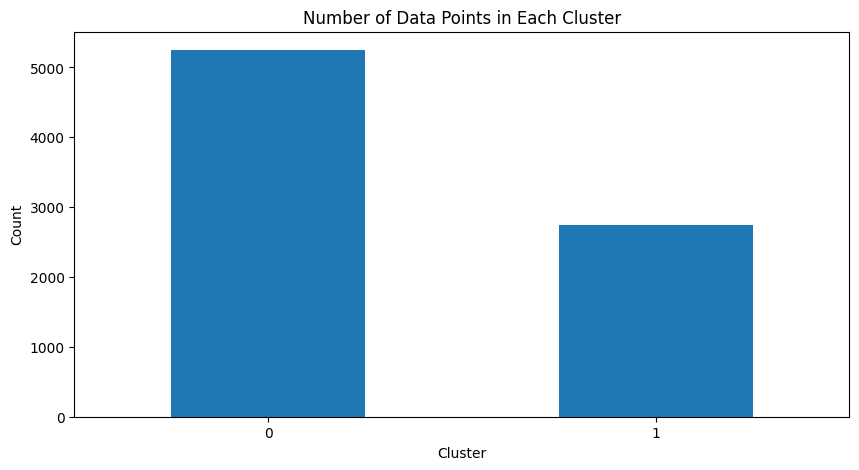

In [ ]:
cluster_counts = sampled_data['cluster'].value_counts().sort_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = cluster_counts.plot(kind='bar')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Number of Data Points in Each Cluster')
plt.xticks(rotation=0)
plt.show()



In [ ]:
# Count the number of data points in each cluster
cluster_counts = sampled_data['cluster'].value_counts()

# Sort the cluster counts by cluster number
cluster_counts = cluster_counts.sort_index()

# Print the cluster counts
print("Number of data points in each cluster:")
print(cluster_counts)


Number of data points in each cluster:
0    5249
1    2751
Name: cluster, dtype: int64


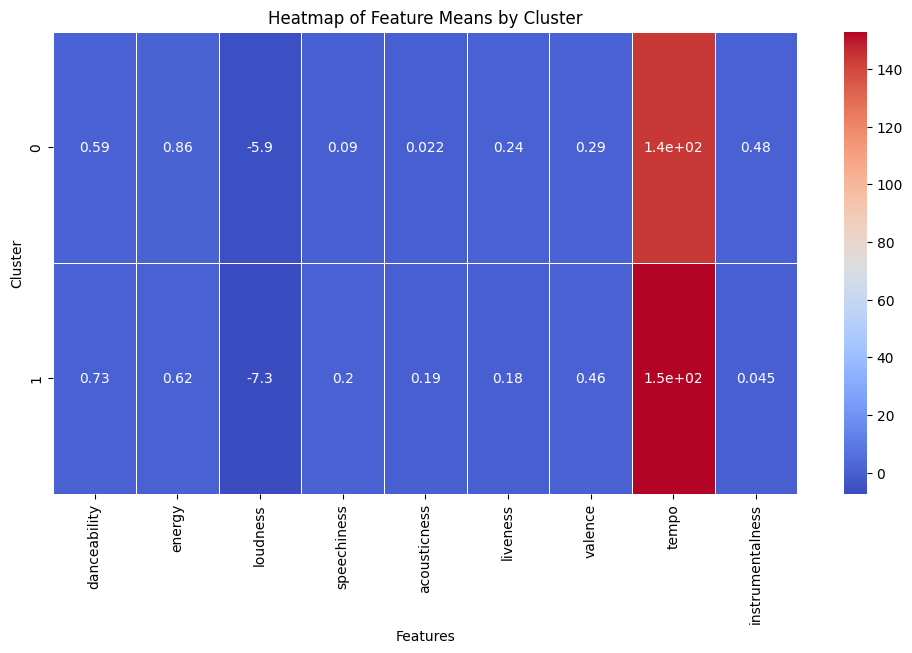

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by cluster labels and calculate the mean for each feature within each group
grouped_data = data_cleaned.groupby('cluster')[selected_columns].mean()

# Create a heatmap of the grouped data
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()